### Пример работы алгоритма HyperNEAT

Импортируем пользовательский модуль hyperneat. Если вычисления проводятся в Google Colab, то необходимо загрузить папку с модулем на Google Drive и перед импортов выполнить следующий код:

```python
import sys
from google.colab import drive

drive.mount('/content/drive')
sys.path.append('путь к директории с модулем')
```

In [19]:
import hyperneat

Определяем параметры алгоритма

In [24]:
args = dict()
args['pop_size'] = 100
args['add_node_prob'] = 0.3
args['add_edge_prob'] = 0.5
args['activ_prob'] = 0.3
args['bias_prob'] = 0.5
args['weight_prob'] = 0.5
args['cross_prob'] = 0.9
args['selection_thresh'] = 0.6
args['distance_thresh'] = 0.4
args['weight_excess'] = 0.2
args['weight_disjoint'] = 0.4
args['weight_node_diff'] = 0.2
args['weight_node_fun'] = 0.2
epochs = 100

Инициализируем экземпляр популяции

In [25]:
pop = hyperneat.Population(args)

Определяем параметры субстрата и путь к файлу с данными

In [26]:
input_dim = (4, 2)
hidden_dim = (4, 10)
output_dim = (2, 1)
hidden_activation = hyperneat.activations.np_sigmoid
output_activation = hyperneat.activations.np_softmax
data_path = "./data/diabetes1.dt"

Инициализируем экземпляры сети с обнулёнными весами и датасета, содержащего тренировочную и тестовую выборки

In [27]:
net = hyperneat.Substrate(input_dim, hidden_dim, output_dim, hidden_activation, output_activation)
dataset = hyperneat.DiabetesDataset(data_path)

Отобразим визуализацию сети в субстрате

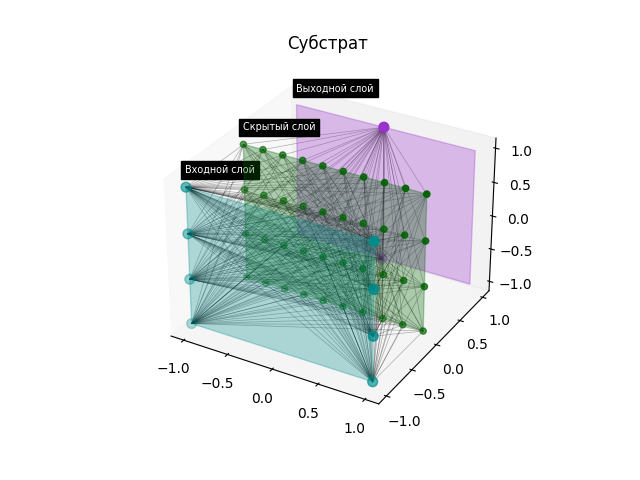

In [39]:
%matplotlib widget
hyperneat.plot_substrate(net)

Проводим эволюционный поиск оптимальных параметров сети с сохранением CPPN, при которой наблюдается наименьшее значение кросс-энтропии.

In [28]:
pop.evolve(epochs, net, dataset.train_data, save=True)

Epoch: 1 Fitness:0.6357077763817439 CE: 0.6357077763817439 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 9.332370766196007
Epoch: 2 Fitness:0.633085797558035 CE: 0.633085797558035 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 3.159635484176615
Epoch: 3 Fitness:0.6273395315082961 CE: 0.6273395315082961 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 3.086328067128315
Epoch: 4 Fitness:0.6273395315082961 CE: 0.6273395315082961 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.714299738211609
Epoch: 5 Fitness:0.6266073329846048 CE: 0.6266073329846048 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.3441338122031752
Epoch: 6 Fitness:0.6276431366501223 CE: 0.6276431366501223 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7803514377888326
Epoch: 7 Fitness:0.6265400341803793 CE: 0.6265400341803793 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.308538173549934
Epoch: 8 Fitness:0.62774839

Рассмотрим изменение метрик на протяжении эволюционного поиска

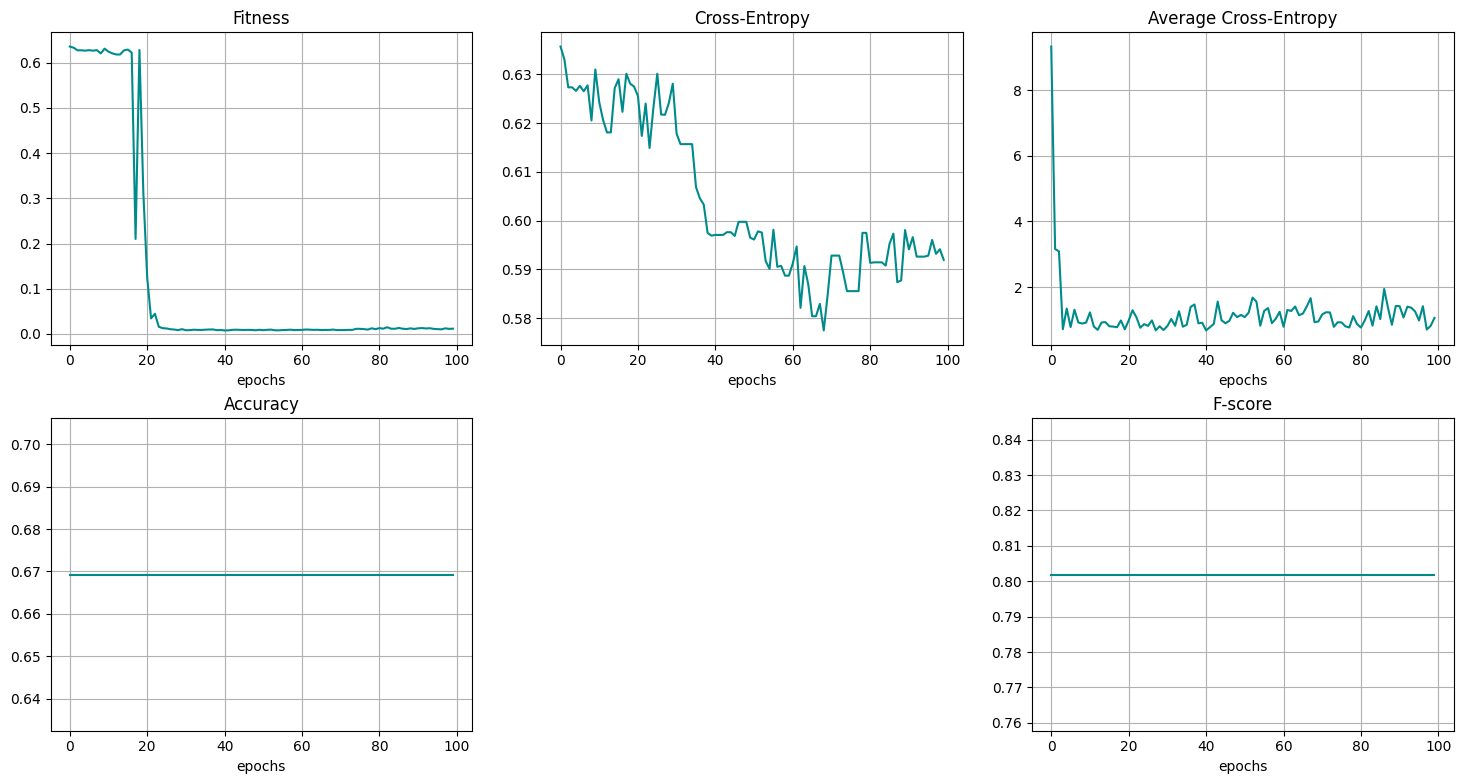

In [29]:
hyperneat.plot_metrics(pop)

Сохраним модель с наиболее удачными весами

In [31]:
best_cppn = pop.returnBest(net, dataset.train_data)
net.setWeights(best_cppn)
net.save('models/04_09_2023_10:16:16/net.hyperneat')

Проведём тестирование модели и вычислим метрики

In [41]:
metrics = net.metrics(dataset.test_data)
print(metrics)

{'loss': 0.6282354355533237, 'accuracy': 0.6354166666666666, 'f_score': 0.7770700636942676, 'confusion_matrix': array([[  0,  70],
       [  0, 122]])}


Построим матрицу ошибок

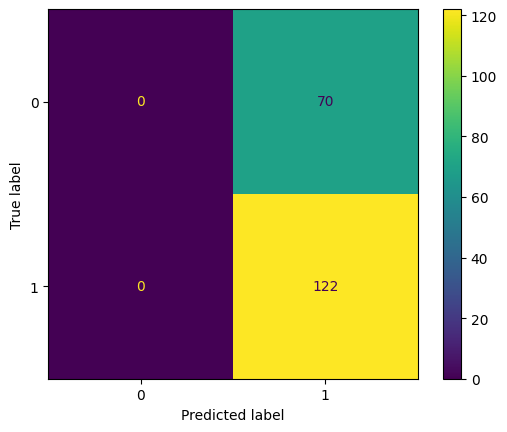

In [35]:
hyperneat.plot_confusion_matrix(metrics['confusion_matrix'])